<a href="https://colab.research.google.com/github/fadulgabriel/CEE2/blob/main/Trabalho_Final_ce2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Este relatório foi desenvolvido utilizando a linguagem de programação *Python*, que nos permitiu realizar uma análise dos dados relacionados ao mercado de acomodações em Paris. Os dados foram extraídos diretamente da API do Airbnb, focando em informações sobre os preços, número de avaliações e tipos de acomodações disponíveis na cidade. O objetivo principal deste estudo é gerar insights que possam auxiliar na tomada de decisões para locações e proporcionar uma melhor compreensão sobre o mercado de acomodações em Paris. Através de gráficos, tabelas e coeficientes dinâmicos, buscamos entender as variações de preços entre os bairros, as influências das avaliações no preço e as diferentes ofertas de imóveis, entre outras análises das variáveis.

# Leitura dos Dados

O objetivo desta etapa é obter uma visão inicial da estrutura do banco de dados.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

caminho = "/content/drive/MyDrive/CE2-Trabalho2-dados/Paris.csv"
df = pd.read_csv(caminho)

print("Primeiras linhas da tabela:\n")
print(df.head())

cambio_euro_real= 6.41
df["price"]= df["price"]*cambio_euro_real

print("\n Primeiras linhas da tabela com preço ajustado de euro para real:\n")
print(df.head())

print("\nInformações gerais sobre o banco de dados:\n")
df.info()

Primeiras linhas da tabela:

     id                                             name  host_id   host_name  \
0  3109                                     zen and calm     3631        Anne   
1  5396     Your perfect Paris studio on Île Saint-Louis     7903      Borzou   
2  7397                 MARAIS - 2ROOMS APT - 2/4 PEOPLE     2626      Franck   
3  7964                     Sunny apartment with balcony    22155       Anaïs   
4  9359  Cozy, Central Paris: WALK or VELIB EVERYWHERE !    28422  Bernadette   

   neighbourhood_group   neighbourhood  latitude  longitude        room_type  \
0                  NaN    Observatoire  48.83191    2.31870  Entire home/apt   
1                  NaN  Hôtel-de-Ville  48.85247    2.35835  Entire home/apt   
2                  NaN  Hôtel-de-Ville  48.85909    2.35315  Entire home/apt   
3                  NaN           Opéra  48.87417    2.34245  Entire home/apt   
4                  NaN          Louvre  48.86006    2.34863  Entire home/apt   

   

As primeiras linhas do conjunto de dados do Airbnb referente à cidade de Paris permitem uma visualização inicial da estrutura e do conteúdo das variáveis.

Para facilitar a interpretação dos resultados e adequar a análise ao contexto brasileiro, os preços originalmente apresentados em euros foram convertidos para reais, utilizando a taxa de câmbio atual $$€1 = R$6,41$$

A estrutura geral do banco de dados revela que o banco possui um total de 86.064 linhas e 18 variáveis (colunas). Entre essas variáveis, destacam-se 6 de natureza categórica e 12 numéricas.

Essa visualização inicial permite compreender melhor a composição e o conteúdo do conjunto de dados, servindo como base para as análises seguintes.


# Análise de Qualidade dos Dados


In [ ]:
print("Existência de valores nulos: \n")
print(df.isnull().sum())

print("\n Tipos de variáveis: \n")
df["last_review"] = pd.to_datetime(df["last_review"])
df["id"] = df["id"].astype("category")
df["host_id"] = df["host_id"].astype("category")
print(df.dtypes)

print("\n Resumo estatístico das principais variáveis numéricas: \n")
var_numericas= df.drop(columns=["latitude", "longitude", "number_of_reviews_ltm"]).select_dtypes(include=["int64", "float64"])
print(var_numericas.describe())

Existência de valores nulos: 

id                                    0
name                                  0
host_id                               0
host_name                            41
neighbourhood_group               86064
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             30409
minimum_nights                        0
number_of_reviews                     0
last_review                       21794
reviews_per_month                 21794
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           18018
dtype: int64

 Tipos de variáveis: 

id                                      category
name                                      object
host_id                                 category
host_name                                 object
neighbourhood_gr

#### **Valores ausentes por variável**:


*   A variável `neighbourhood_group` apresenta 100% de valores ausentes. Com isso, ela pode ser descartada da análise.
*   A variável `price` possui 30.409 valores nulos, o que corresponde a cerca de 35% do total de linhas. Como se trata de uma variável central na análise, os registros com valores ausentes serão excluídos nas análises que envolvem preço.
*   `last_review` e `reviews_per_month` também apresentam valores ausentes (21.794 registros), pois `reviews_per_month` depende da existência de uma data de última avaliação.
*   A variável `license` apresenta 18.018 valores ausentes, e seu tratamento dependerá da relevância na análise futura.
*   `host_name` tem poucos valores ausentes (41) e pode ser mantida.



#### **Tipos de variáveis**:


*   As variáveis `id` e `host_id` foram convertidas para de numéricas para categóricas, pois são identificadores.
*   `last_review` foi convertida para datetime, possibilitando operações temporais.
*   As demais variáveis foram classificadas automaticamente como object, float64 ou int64.

#### **Resumo estatístico das variáveis**:


*  A variável `price` mostra forte assimetria à direita (média bem superior à mediana), o que reforça a existência de **valores extremos (outliers)**. O mesmo comportamento é observado em `minimum_nights`, `calculated_host_listings_count` e nas outras variáveis, indicando que alguns anúncios fogem bastante do padrão da maioria.

# Análise Estatística Descritiva dos Preços

Média: R$1612.69
Mediana: R$935.86
Desvio Padrão: R$3908.00
Mínimo: R$51.28
Máximo: R$194864.00 

Número de outliers: 4664 

Maiores preços considerados outliers:
60634    194864.00
6662     173070.00
59847    155122.00
12313    155122.00
66526    154038.71
66428    128200.00
72582    117963.23
44500     96150.00
65171     92925.77
85887     90015.63
Name: price, dtype: float64 

Outliers representam 8.38% dos preços. 



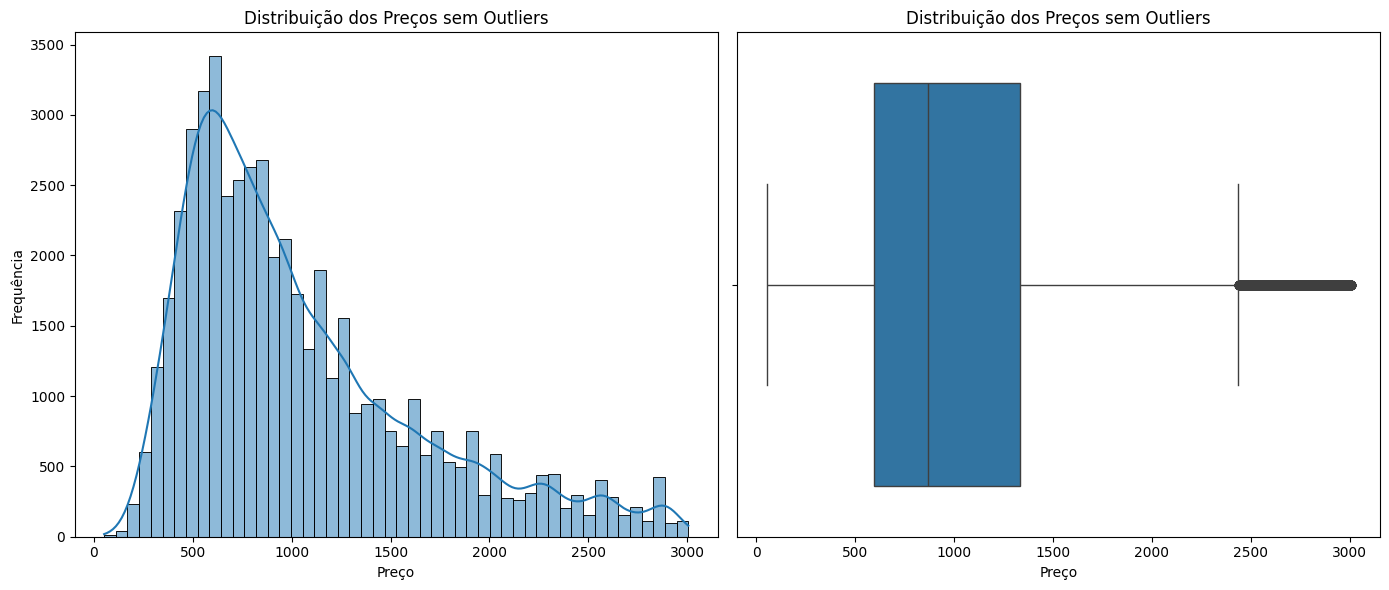

In [ ]:
preços= df["price"].dropna()

print(f"Média: R${preços.mean():.2f}")
print(f"Mediana: R${preços.median():.2f}")
print(f"Desvio Padrão: R${preços.std():.2f}")
print(f"Mínimo: R${preços.min():.2f}")
print(f"Máximo: R${preços.max():.2f} \n")

# Identificando outliers
## Regra do intervalo interquartil (iqr)
Q1 = preços.quantile(0.25)
Q3 = preços.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = preços[(preços < limite_inferior) | (preços > limite_superior)]
print(f"Número de outliers: {len(outliers)} \n")
print("Maiores preços considerados outliers:")
print(f"{outliers.sort_values(ascending=False).head(10)} \n")
percentual = len(outliers) / len(preços) * 100
print(f"Outliers representam {percentual:.2f}% dos preços. \n")


# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

preços_limite_superior= preços[preços <= limite_superior]

plt.figure(figsize=(14, 6))

## Histograma
plt.subplot(1, 2, 1)
sns.histplot(preços_limite_superior, bins=50, kde=True)
plt.title('Distribuição dos Preços sem Outliers')
plt.xlabel('Preço')
plt.ylabel('Frequência')

## Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=preços_limite_superior)
plt.title('Distribuição dos Preços sem Outliers')
plt.xlabel('Preço')

plt.tight_layout()
plt.show()

#### **Medidas descritivas:**

Foram calculadas as principais medidas descritivas da variável `price`, já convertida para reais. Os resultados mostram que os preços apresentam uma grande variação, com valores bastante elevados em alguns casos.

Observa-se que a média é bem superior à mediana, indicando uma distribuição assimétrica à direita (com cauda longa), o que é típico de variáveis com valores extremos elevados.


#### **Identificação e análise dos outliers:**

Com base na regra do intervalo interquartil (IQR), foram identificados **4.664 anúncios** com preços considerados outliers. Os maiores preços encontrados ultrapassam R\$90.000, chegando a um máximo de R$194.864 .

Esses valores extremos podem estar relacionados a anúncios de luxo ou mesmo a erros de preenchimento dos dados. Os outliers representam cerca de **8,38%** do total de anúncios e devem ser analisados com cuidado, pois têm grande impacto nas estatísticas gerais e na interpretação dos resultados.

#### **Distribuição dos preços:**

A distribuição dos preços foi analisada por meio de um **histograma** e um **boxplot**. Inicialmente, os gráficos mostraram que a maior parte dos preços está concentrada em valores baixos, com alguns anúncios com preços muito elevados distorcendo a escala.

Para evidenciar a distribuição típica dos preços (onde a maioria dos anúncios se concentra), os gráficos foram gerados **sem os outliers** — isto é, considerando apenas os preços abaixo do limite superior definido pela regra do intervalo interquartil (IQR).

# Análise de Preço por Bairro


#### **Tabela do preço médio por bairro:**

Para introduzir esta fase da análise, calculou-se a média de preço de cada bairro da cidade de Paris. Os dados foram agrupados de acordo com as subdivisões da localidade e ordenados de maneira crescente para a exposição tabular


In [ ]:
from IPython.display import display, Latex
tabela1 = pd.pivot_table(df, values="price", index="neighbourhood", aggfunc="mean")
tabela1 = tabela1.sort_values(by="price", ascending=True)
tabela1latex = tabela1.to_latex()
tabela1 = tabela1.round(2)

\begin{array}{|l|r|}
\hline
\textbf{Bairro} & \textbf{Preço Médio (R\$)} \\
\hline
Ménilmontant & 979,15 \\
Gobelins & 1070,83 \\
Buttes\text{-}Montmartre & 1159,76 \\
Observatoire & 1270,92 \\
Buttes\text{-}Chaumont & 1288,99 \\
Entrepôt & 1298,60 \\
Popincourt & 1308,27 \\
Vaugirard & 1495,63 \\
Reuilly & 1503,96 \\
Batignolles\text{-}Monceau & 1577,89 \\
Opéra & 1653,31 \\
Temple & 1661,43 \\
Panthéon & 1711,89 \\
Bourse & 1811,92 \\
Luxembourg & 2009,39 \\
Hôtel\text{-}de\text{-}Ville & 2035,92 \\
Louvre & 2195,44 \\
Palais\text{-}Bourbon & 2239,60 \\
Passy & 2394,45 \\
Élysée & 2739,26 \\
\hline
\end{array}

#### **Gráfico de barras do preço médio por bairro:**

<Figure size 1000x1000 with 0 Axes>

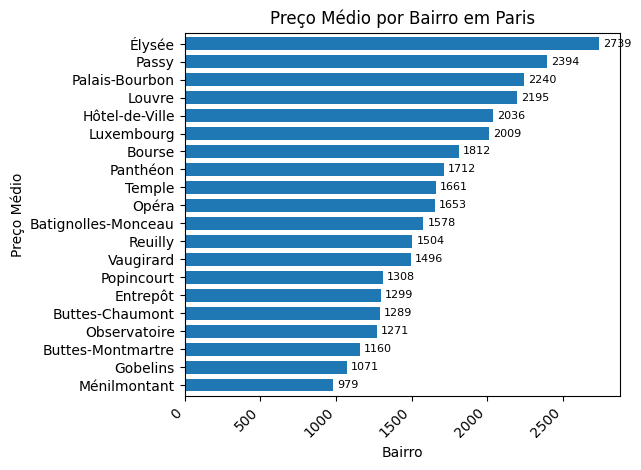

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax = tabela1.plot(kind='barh', legend=False, width = 0.7)
plt.title('Preço Médio por Bairro em Paris')
plt.xlabel('Bairro')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8, padding=3, labels=[f'{v.get_width():.0f}' for v in container])

plt.show()


# Visualização Geográfica

Para a construção do mapa, primeiramente foi analisado o boxplot da variável contínua "preço", a fim de visualizar sua distribuição. Em seguida, o objeto da análise foi decomposto em três intervalos: de 0 a 640 (representado pela cor verde), de 641 a 961 (cor amarela) e, a partir de 962, utilizou-se a cor vermelha. Essa categorização teve como objetivo destacar a variação nos valores e sinalizar possíveis estadias mais acessíveis.




In [ ]:
import pandas as pd
import folium
import folium.plugins as plugins
from IPython.display import display

# Limpa os dados
df = df.dropna(subset=['latitude', 'longitude', 'price', 'neighbourhood', 'name', 'calculated_host_listings_count'])
df_amostra = df.sample(n= 300, random_state=1)
df_amostra['name'] = df_amostra['name'].astype(str).str.slice(0, 100)  # evita textos longos

# Função de cor por preço
def cor_por_preco(preco):
    if preco <= 641:
        return "green"
    elif preco <= 961:
        return "orange"
    else:
        return "red"

# Cria o mapa
mapa = folium.Map(location=[48.8566, 2.3522], zoom_start=12)
marker_cluster = plugins.MarkerCluster().add_to(mapa)

# Loop para adicionar marcadores
for _, row in df_amostra.iterrows():
    try:
        tooltip_text = (
            f"<b>Bairro:</b> {row['neighbourhood']}<br>"
            f"<b>Nome do Anúncio:</b> {row['name']}<br>"
            f"<b>Anúncios do anfitrião:</b> {row['calculated_host_listings_count']}<br>"
            f"<b>Preço:</b> R$ {row['price']:.2f}"
        )

        popup_text = f"<strong>{row['neighbourhood']}</strong><br>Preço: €{row['price']:.2f}"

        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=popup_text,
            tooltip=tooltip_text,
            icon=folium.Icon(color=cor_por_preco(row['price']), icon="home")
        ).add_to(marker_cluster)
    except Exception as e:
        print("Erro em linha:", e)

# Exibe o mapa
display(mapa)


# Análise de Relação entre Variáveis

#### **Gráfico de dispersão:**

Buscou-se comparar o preço com as variáveis discretas disponibilidade anual, que é a quantidade de dias que o local está disponível para aluguel no espaço de uma ano, variando entre 1 e 365, e com o número de reviews, também quantitativa discreta. Para ambas as visualizações, filtrou-se do banco todos os preços acima de 1000 euros. Além disso, foi gerada uma amostra aleatória de tamanho 1000 do banco de dados para melhorar a visualização dos pontos nos gráficos.

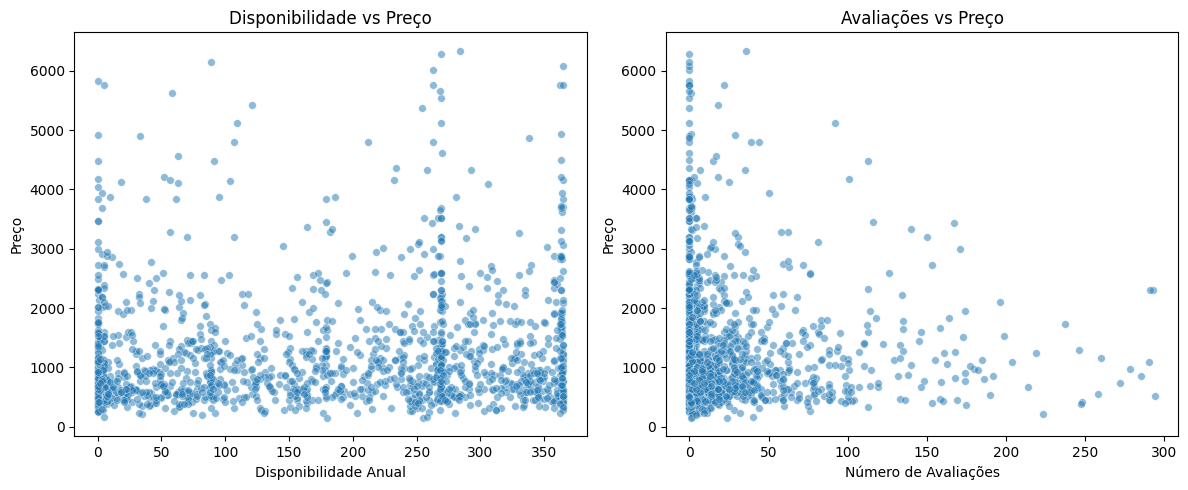

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
df_dispersao = df.dropna(subset=['latitude', 'longitude']).sample(n=1500, random_state=1)
df_dispersao = df_dispersao[df_dispersao['price' ] < 6410]
df_dispersao = df_dispersao[df_dispersao['number_of_reviews' ] < 300]
plt.figure(figsize=(12, 5))

# Gráfico 1 – Disponibilidade Anual vs Preço
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_dispersao, x="availability_365", y="price", alpha=0.5, s= 30)
plt.xlabel("Disponibilidade Anual")
plt.ylabel("Preço")
plt.title("Disponibilidade vs Preço")

# Gráfico 2 – Número de Avaliações vs Preço
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_dispersao, x="number_of_reviews", y="price", alpha=0.5, s= 30)
plt.xlabel("Número de Avaliações")
plt.ylabel("Preço")
plt.title("Avaliações vs Preço")

# Ajuste de layout
plt.tight_layout()
plt.show()

#### **Mapa de calor das correlações:**

O objetivo do gráfico a seguir é investigar possíveis indícios de correlação entre as variáveis selecionadas e o preço. Para isso, utilizou-se o mapa de calor com Coeficientes de Correlação de Pearson



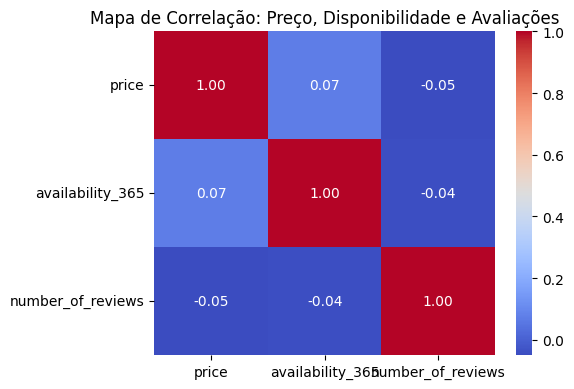

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra o DataFrame para evitar valores ausentes e preços extremos
df_corr = df.dropna(subset=['price', 'availability_365', 'number_of_reviews'])


# Seleciona as variáveis de interesse
variaveis = ['price', 'availability_365', 'number_of_reviews']

# Calcula a matriz de correlação
matriz_corr = df_corr[variaveis].corr()

# Gera o heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação: Preço, Disponibilidade e Avaliações")
plt.tight_layout()
plt.show()


# Modelagem Estatística

Para essa seção foi desenvolvido um modelo de regressão linear simples com o objetivo de explicar o preço dos anúncios (`price`) com base no número de avaliações (`number_of_reviews`). Durante o processo de análise, observou-se que a presença de outliers estava distorcendo a relação entre as variáveis, afetando negativamente o modelo. Para mitigar esse impacto, foi aplicada a regra do intervalo interquartil (IQR), definida como $IQR=Q3−Q1$, com o intuito de remover os valores extremos. Com a eliminação dos outliers, o modelo foi refinado, permitindo uma interpretação mais precisa da relação entre o número de avaliações e o preço dos anúncios.

In [ ]:
from sklearn.linear_model import LinearRegression

# Remover valores nulos nas variáveis de interesse (number_of_reviews e price)
df = df.dropna(subset=['price', 'number_of_reviews'])
y = df['price']

# Identificando outliers usando o intervalo interquartil (IQR)
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

# Calculando limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando os outliers
outliers = y[(y < limite_inferior) | (y > limite_superior)]

# Removendo os outliers
df_sem_outliers = df[(y >= limite_inferior) & (y <= limite_superior)]

# Definir a variável independentes (X) e dependentes (y)
X = df_sem_outliers[['number_of_reviews']]
y = df_sem_outliers['price']

# Inicializando o modelo de regressão linear simples
model = LinearRegression()

# Treinando o modelo com os dados
model.fit(X, y)

# Coeficientes da reta ajustada (intercepto e inclinação)
intercept = model.intercept_
slope = model.coef_[0]

print(f'Intercepto (B0): {intercept}')
print(f'Inclinação (B1): {slope}')


Intercepto (B0): 1058.9096180718263
Inclinação (B1): -0.40393987310172785


#### **Gráfico com a linha de regressão ajustada:**

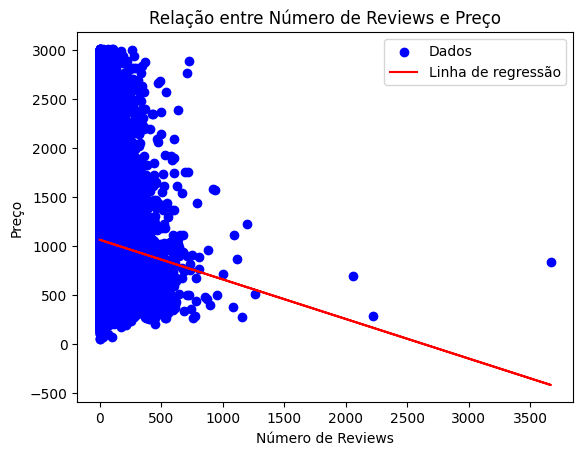

In [ ]:
import matplotlib.pyplot as plt

# Realizando as previsões com o modelo ajustado
y_pred = model.predict(X)

# Criando o gráfico de dispersão dos dados reais
plt.scatter(X, y, color='blue', label='Dados')

# Adicionando a linha de regressão ajustada
plt.plot(X, y_pred, color='red', label='Linha de regressão')

# Labels e título para o gráfico
plt.xlabel('Número de Reviews')
plt.ylabel('Preço')
plt.title('Relação entre Número de Reviews e Preço')
plt.legend()

# Exibindo o gráfico
plt.show()


#### **Interpretação dos resultados:**

Diante dos coeficientes obtidos a equação do modelo ajustado é dada por:

$$ Preço = 1.058,91 - 0,40 × Avaliações $$

O intercepto ($\beta$0) é o valor estimado do preço quando o número de reviews é igual a zero. Em termos práticos, isso sugere que, se um anúncio não tiver nenhum review, o preço estimado seria de aproximadamente R$1.058,20 reais.

Já o coeficiente de inclinação ($\beta$1) indica que, para cada aumento de uma unidade no número de avaliações, o preço médio do anúncio diminui em R$0,40 reais. Há uma relação inversa entre o número de avaliações e o preço do anúncio. Isso pode sugerir que, conforme o número de avaliações de um anúncio aumenta, ele tende a ser associado a um preço mais baixo. Isso pode ocorrer devido à percepção de que anúncios com muitas avaliações podem ser mais populares ou ter maior competitividade, o que pode resultar em preços mais baixos.

# Visualização Avançada

Esta seção tem como objetivo apresentar dois gráficos interativos, desenvolvidos com o intuito de melhorar a visualização dos dados e proporcionar uma experiência mais intuitiva ao usuário.

In [ ]:
import folium
import pandas as pd
from IPython.display import display, HTML

# Média geral de Paris para o preço e avaliações
media_price = df['price'].mean()
media_avaliacoes = df['number_of_reviews'].mean()

# Definindo a margem de tolerância de 10% para comparar as médias de preço
margem = media_price * 0.2
margem2 = media_price * 0.2

# Calculando as médias de preço e de número de avaliações por bairro
df_media = df.groupby('neighbourhood').agg(
    avg_price=('price', 'mean'),
    avg_reviews=('number_of_reviews', 'mean'),
    latitude=('latitude', 'mean'),
    longitude=('longitude', 'mean')).reset_index()

# Criando o mapa centrado em Paris com o zoom inicial
m = folium.Map(location=[48.8566, 2.3522], zoom_start=11.6)

# Adicionando os pontos no mapa com base na comparação com a média de Paris e na média de avaliações
for index, row in df_media.iterrows():
    # Determinando a cor do ponto com base na média de preço
    if row['avg_price'] > media_price + margem:
        cor = "red"
    elif row['avg_price'] < media_price - margem:
        cor = "green"
    else:
        cor = "yellow"

    # Determinando o tamanho do ponto com base na média de avaliações
    if row['avg_reviews'] > media_avaliacoes:
        raio = 11
    elif row['avg_reviews'] < media_avaliacoes:
        raio = 6

    # Criando o popup com HTML
    popup_content = f"""
    <strong>Bairro:</strong> {row['neighbourhood']}<br>
    <strong>Média de Preço:</strong> {row['avg_price']:.2f} reais<br>
    <strong>Média de Avaliações:</strong> {row['avg_reviews']:.0f} avaliações
    """

    # Criando o marcador de círculo no mapa
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=raio,
        popup=folium.Popup(popup_content, max_width=300),
        color=cor,
        fill=True,
        fill_color=cor,
        fill_opacity=0.5).add_to(m)

m

Na visualização do mapa interativo, cada bairro de Paris é representado por um indicador que varia em cor e tamanho. A cor do marcador reflete a comparação do preço médio de cada bairro com a média geral de Paris:

* Vermelho: Bairros com preços acima da média.

* Amarelo: Bairros cujos preços estão dentro da margem de 10% da média, indicando que o preço está próximo da média de todos os bairros.

* Verde: Bairros com preços abaixo da média.

A margem de 10% foi definida para determinar os bairros que estão dentro dessa faixa, facilitando a visualização de quais bairros se destacam em relação aos preços médios. Dessa forma, os bairros amarelos indicam que o preço de suas locações está dentro desse intervalo.

Além disso, o tamanho dos indicadores está relacionado ao número médio de avaliações que as locações de cada bairro receberam:

* Marcadores grandes: Representam bairros com média de avaliações acima da média de Paris.

* Marcadores pequenos: Indicam bairros com menos avaliações que a média de Paris.

In [ ]:
import plotly.express as px
import pandas as pd

# Contando a quantidade de tipos de acomodação por bairro
df_room_type = df.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')

# Mapeamento de traduções de tipos de acomodação
room_type_translation = {
    'Entire home/apt': 'Apartamento/Casa inteira',
    'Private room': 'Quarto Privado',
    'Shared room': 'Quarto compartilhado',
    'Hotel room': 'Quarto de Hotel'}

# Lista dos tipos de acomodação disponíveis (em inglês)
room_type_options = df_room_type['room_type'].unique()

# Criando o gráfico inicial com todos os tipos de acomodação visíveis
fig = px.bar(df_room_type,
             x='neighbourhood',
             y='count',
             color='room_type',
             title="Tipos de Acomodação por Bairro",
             labels={'count': 'Quantidade de Acomodações', 'room_type': 'Tipo de Acomodação'},
             height=600)

# Adicionando a opção "Todos" e os tipos de acomodação ao dropdown
dropdown_buttons = [
    {
        'label': 'Todos',  # Adicionando o botão "Todos"
        'method': 'update',
        'args': [
            {'visible': [True] * len(room_type_options)},  # Tornando todos os tipos visíveis
            {'title': 'Tipo de Acomodação por Bairro'}
        ]
    },
    *[
        {
            'label': room_type_translation[room_type],
            'method': 'update',
            'args': [
                {'visible': [room == room_type for room in room_type_options]},  # Tornando visível apenas o tipo selecionado
                {'title': f'Tipo de Acomodação por Bairro: {room_type_translation[room_type]}'}
            ]
        }
        for room_type in room_type_options
    ]
]

# Ajustando o layout do gráfico
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'active': 0,  # Faz com que o tipo "Todos" seja o selecionado por padrão
        'x': 0.1,
        'xanchor': 'left',
        'y': 1.15,
        'yanchor': 'bottom'
    }],
    # Removendo a legenda
    showlegend=False,
    # Ajustando título e barra de seleção
    title_x=0.5,  # Centralizando o título
    title_y=0.95,  # Ajustando a posição do título
    margin=dict(t=50),
    xaxis_title="Bairro"
)

# Converte o gráfico para HTML, sem o código completo do Plotly (para evitar problemas com o arquivo HTML)
grafico_html = fig.to_html(full_html=False, include_plotlyjs='cdn')

# Exibe o gráfico no notebook
from IPython.display import HTML
HTML(grafico_html)

# Salvar o gráfico como um arquivo HTML separado
with open('grafico_interativo.html', 'w') as f:
    f.write(grafico_html)


In [ ]:
# Incluir o gráfico HTML diretamente no relatório
from IPython.display import HTML

# Referenciar o caminho do arquivo HTML do gráfico
HTML('grafico_interativo.html')

Pelo gráfico interativo, é possível avaliar a quantidade de cada tipo de acomodação disponível para cada bairro de Paris no Airbnb. A visualização permite perceber de forma clara a distribuição de tipos de imóveis em cada bairro. Desse modo, é evidente a grande diferença na quantidade de apartamentos e casas inteiras em relação aos outros tipos de acomodações para todos os bairros.

# Conclusão



Em conclusão, a análise dos anúncios de acomodações no Airbnb em Paris nos revelou que a média de preço geral foi de 1.612 reais, com um mínimo de 51 reais e um máximo impressionante de 194.864 reais, o que indicou a presença de imóveis de luxo ou possíveis erros de preenchimento de dados. A mediana do preço foi de 935 reais, com um desvio padrão de R\$3.908, refletindo uma grande variação nos preços dos imóveis. A presença de 4.664 outliers, que representam 8,38% do total de anúncios, teve um impacto significativo nas estatísticas gerais e foi tratada utilizando a regra do intervalo interquartil (IQR), removendo os valores extremos para permitir uma análise mais precisa da distribuição típica dos preços.

Os bairros de Paris mostraram uma grande variação nos preços médios, com bairros como Ménilmontant apresentando preços médios de 979 reais, enquanto bairros mais centrais e turísticos, como Élysée, alcançaram preços médios de 2.739 reais. Além disso, as visualizações geográficas reforçam a percepção de que os preços são mais elevados nas áreas centrais e próximas aos principais pontos turísticos, enquanto bairros mais periféricos apresentam valores mais acessíveis.

O modelo de regressão linear, desconsiderado os outliers, indicou uma relação inversa entre o número de avaliações e o preço dos anúncios. Isso sugere que, à medida que o número de avaliações aumenta, o preço dos anúncios tende a diminuir, possivelmente devido à maior competitividade de anúncios populares. Além disso, a análise do gráfico de barras interativo revelou a predominância de apartamentos e casas inteiras em relação a outros tipos de acomodações, com grande variação no número de opções disponíveis para cada bairro. Essas observações são fundamentais para as dinâmicas do mercado de aluguéis e ajudam na tomada de decisões para locações em Paris.